/***************Titanic Data Analysis***************/
Library we are using 
Pandas: for powerful data manipulation and analysis tools
Seaborn: It has built in datasets and provides high evel interface 
for drawing attractive and informative statistical graphics

In [77]:
import pandas as pd
import seaborn as sns 
import matplotlib as plt


In [78]:
# Load and display the few data
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [79]:
# display summary information about the dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


DATA CLEANING
Data cleaning involves removing or correcting inaccuracies, handling missing values, and ensuring consistency.

Why are we using this method?

Missing values can lead to errors and biases in the analysis.
Ensuring consistent and accurate data helps in obtaining reliable results.

In [80]:
# Check missing values
print(titanic.isnull().sum())

# Drop columns with a high percentage of missing values 
titanic = titanic.drop(columns=['deck'])

# Fill missing values in 'embarked' with the most common value
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Fill missing values in 'age' with the median value
titanic['age'] = titanic['age'].fillna(titanic['age'].median)

# Drop rows with missing values in 'embark_town' amd 'embarked'
titanic = titanic.dropna(subset=['embark_town'])

# verify ther are no more missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [81]:
# Descriptive statistics
print(titanic.describe())

         survived      pclass       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586    0.524184    0.382452   32.096681
std      0.486260    0.834700    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000    8.000000    6.000000  512.329200


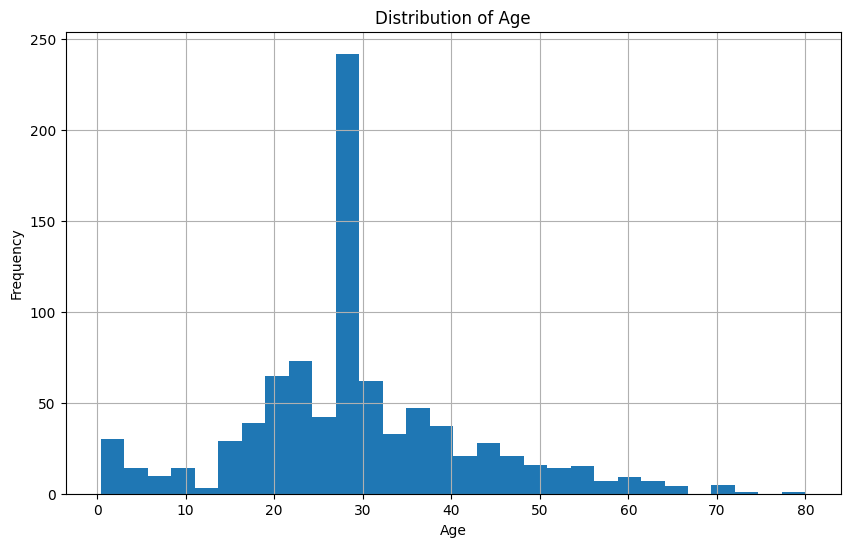

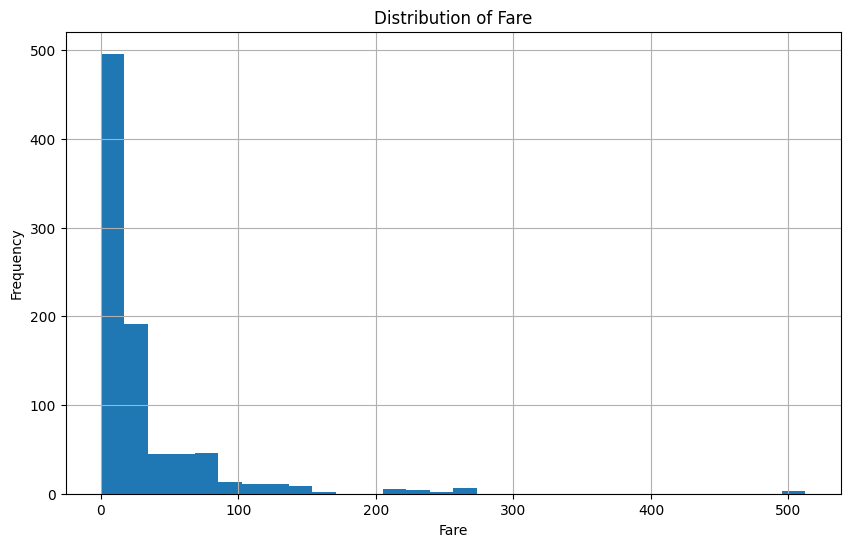

In [82]:
import matplotlib.pyplot as plt
# Convert the 'age' column to numeric values, coercing errors to NaN
titanic['age'] = pd.to_numeric(titanic['age'], errors='coerce')

# Fill any NaN values with the median age
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

plt.figure(figsize=(10, 6))
titanic['age'].hist(bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
titanic['fare'].hist(bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

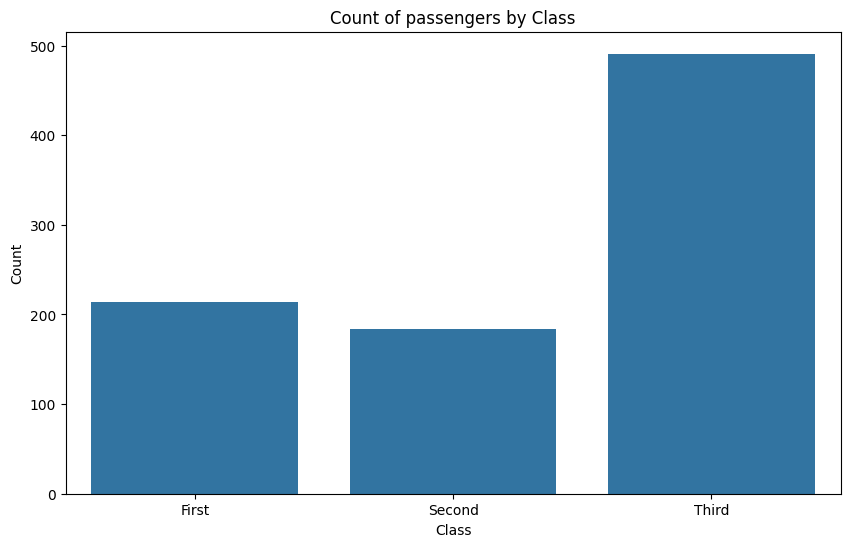

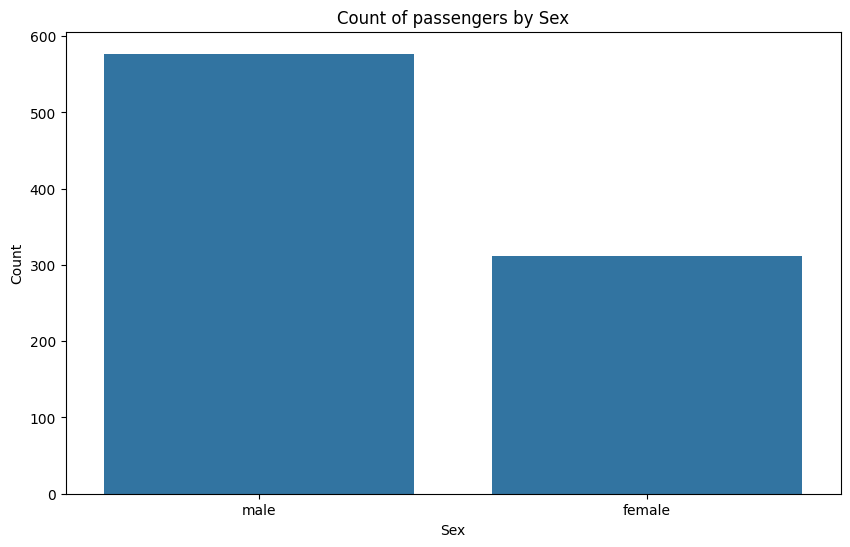

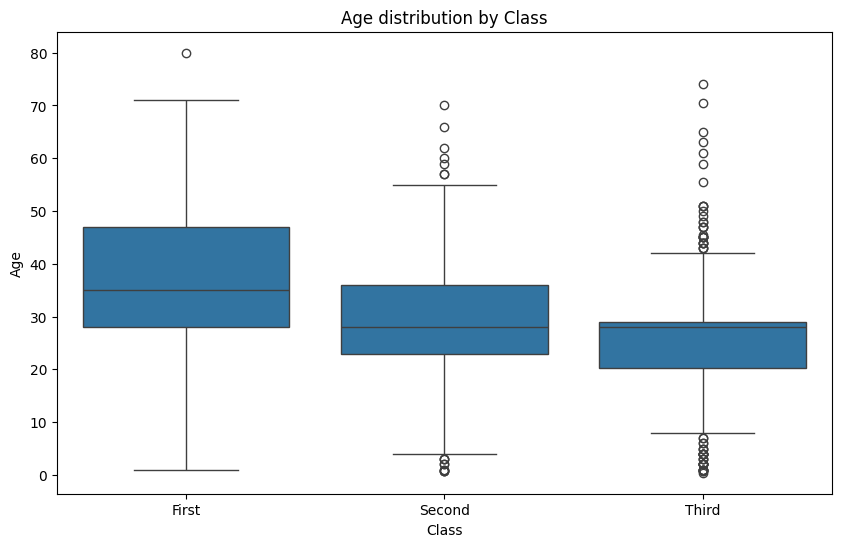

In [83]:
import seaborn as sns

#  count plot for the class variable
plt.figure(figsize=(10,6))
sns.countplot(x="class", data=titanic)
plt.title("Count of passengers by Class")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# count plot for the 'sex' variable
plt.figure(figsize=(10,6))
sns.countplot(x="sex", data=titanic)
plt.title("Count of passengers by Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# box plot of age by class
plt.figure(figsize=(10,6))
sns.boxplot(x="class", y="age", data=titanic)
plt.title("Age distribution by Class")
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

In [84]:
# Survival rate by class
survival_by_class = titanic.groupby('class')['survived'].mean()
print(survival_by_class)

# Survival rate by sex
survival_by_sex = titanic.groupby('sex')['survived'].mean()
print(survival_by_sex)

class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [85]:
# Drop 'alive' column as it's redundant with 'survived'
titanic = titanic.drop(columns=['alive'])

# covert 'sex', 'embarked' and 'class' to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female':1, 'woman':1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})

titanic = pd.get_dummies(titanic, columns=['who', 'embark_town', 'pclass', 'adult_male', 'alone'])

# Drop any remaining rows with missing values 
titanic = titanic.dropna()

# Verify no missing values are left
print(titanic.isnull().sum())

survived                   0
sex                        0
age                        0
sibsp                      0
parch                      0
fare                       0
embarked                   0
class                      0
who_child                  0
who_man                    0
who_woman                  0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
pclass_1                   0
pclass_2                   0
pclass_3                   0
adult_male_False           0
adult_male_True            0
alone_False                0
alone_True                 0
dtype: int64


**Feature Engineering**

Feature engineering involves creating new features or modifying existing ones to improve model performance.

In [86]:
# Create a new feature 'falimy_size' by combining 'sibsp' and 'parch'
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

# drop the 'sibsp' and 'parch' columns as they are now redundant
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)

Split the Data into Training and Testing Sets
We need to split the dataset into a training set (for training the model) and a testing set (for evaluating the model).

In [87]:
from sklearn.model_selection import train_test_split

# Define features (X) and (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


Choose and Train Machine Learning Model

In [88]:
from sklearn.linear_model import LogisticRegression

# Initialize the momdel 
model = LogisticRegression(max_iter = 200)

# Train the model
model.fit(X_train, y_train)

c:\Users\Siddharth M Gajjar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

Evaluate the Model

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("Confusion Matrix: \n", conf_matrix)



Accuracy:  0.8146067415730337
Precision:  0.7432432432432432
Recall:  0.7971014492753623
Confusion Matrix: 
 [[90 19]
 [14 55]]


Make Prediction

In [90]:
# Making prediction on the first 5 samples of the test set

predictions = model.predict(X_test[:5])
print(predictions)

[0 1 1 0 1]


Improve the Model

To improve the model, we can try different algorithms, tune hyperparameters, and perform more advanced feature engineering. Let's try a few improvements:

Try different algorithms (e.g., Random Forest, Support Vector Machine, etc.).
Hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
Advanced feature engineering (e.g., creating interaction terms, scaling features, etc.).

Using a Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [92]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_param =grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [93]:
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_rf)}')


Random Forest Accuracy: 0.7865168539325843
Random Forest Precision: 0.7246376811594203
Random Forest Recall: 0.7246376811594203
Confusion Matrix:
[[90 19]
 [19 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



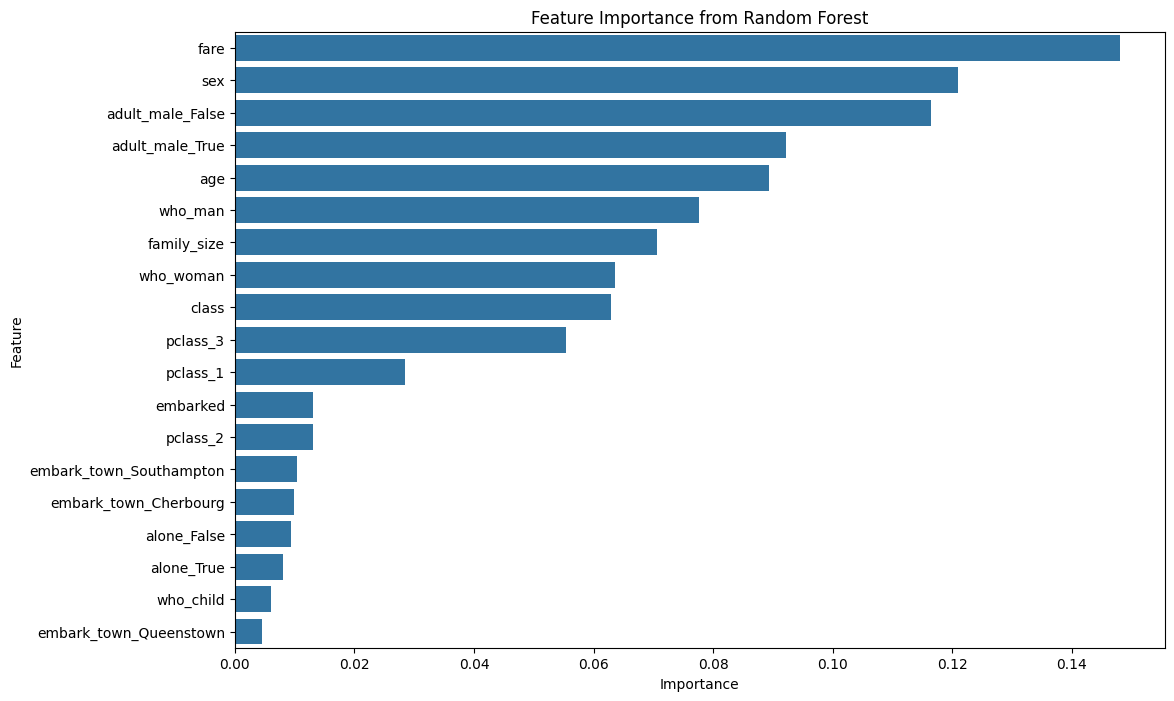

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [95]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std()}')


Cross-Validation Scores: [0.82022472 0.79213483 0.84831461 0.80337079 0.84180791]
Mean CV Accuracy: 0.8211705706849489
Standard Deviation of CV Accuracy: 0.021556899383139583


In [96]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the models
svm_model = SVC()
gb_model = GradientBoostingClassifier()

# Train and evaluate the SVM model
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Train and evaluate the Gradient Boosting model
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)

# Print evaluation metrics for all models
print(f'SVM Accuracy: {accuracy_svm}')
print(f'SVM Precision: {precision_svm}')
print(f'SVM Recall: {recall_svm}')
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting Precision: {precision_gb}')
print(f'Gradient Boosting Recall: {recall_gb}')


SVM Accuracy: 0.6910112359550562
SVM Precision: 0.7333333333333333
SVM Recall: 0.3188405797101449
Gradient Boosting Accuracy: 0.8089887640449438
Gradient Boosting Precision: 0.7464788732394366
Gradient Boosting Recall: 0.7681159420289855


In [97]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.pkl')



['best_rf_model.pkl']